In [1]:
from pathlib import Path
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
import torchvision.models as models
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *
from RNN_classes_funcs_Marchese import *

/home/CAMPUS/cemb2020/anaconda3/envs/arcslab/lib/python3.8/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=3)

In [3]:
# Get classes and filenames
path = Path("data_RNN")
classes = get_class_labels(path)
all_filenames = get_filenames(path)
all_filenames.sort()

In [4]:
# Getting size of dataset and corresponding list of indices
dataset_size = len(all_filenames)
dataset_indices = list(range(dataset_size))

In [5]:
# Getting index for where we want to split the data
val_split_index = int(np.floor(0.2 * dataset_size))

In [6]:
# Splitting list of indices into training and validation indices
train_idx, val_idx = dataset_indices[val_split_index:], dataset_indices[:val_split_index]

In [7]:
# Getting list of filenames for training and validation set
train_filenames = [all_filenames[i] for i in train_idx]
val_filenames = [all_filenames[i] for i in val_idx]
train_filenames

[Path('data_RNN/01390-straight-straight.png'),
 Path('data_RNN/01391-straight-straight.png'),
 Path('data_RNN/01392-straight-straight.png'),
 Path('data_RNN/01393-straight-straight.png'),
 Path('data_RNN/01394-straight-straight.png'),
 Path('data_RNN/01395-straight-straight.png'),
 Path('data_RNN/01396-straight-straight.png'),
 Path('data_RNN/01397-straight-straight.png'),
 Path('data_RNN/01398-straight-straight.png'),
 Path('data_RNN/01399-straight-straight.png'),
 Path('data_RNN/01400-straight-straight.png'),
 Path('data_RNN/01401-straight-straight.png'),
 Path('data_RNN/01402-straight-straight.png'),
 Path('data_RNN/01403-straight-straight.png'),
 Path('data_RNN/01404-straight-straight.png'),
 Path('data_RNN/01405-straight-straight.png'),
 Path('data_RNN/01406-straight-straight.png'),
 Path('data_RNN/01407-straight-straight.png'),
 Path('data_RNN/01408-straight-straight.png'),
 Path('data_RNN/01409-straight-straight.png'),
 Path('data_RNN/01410-straight-straight.png'),
 Path('data_R

In [8]:
# Getting data via custom dataset
train_data = ImageDataset(classes, train_filenames)
val_data = ImageDataset(classes, val_filenames)

In [9]:
# Creating DataLoader
dls = DataLoaders.from_dsets(train_data, val_data, bs=32, shuffle=False)
dls = dls.cuda()

In [10]:
net = ConvRNN()
net.to(device)

ConvRNN(
  (convlstm): ConvLSTM(
    (cell_list): ModuleList(
      (0): ConvLSTMCell(
        (conv): Conv2d(13, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): ConvLSTMCell(
        (conv): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (2): ConvLSTMCell(
        (conv): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (3): ConvLSTMCell(
        (conv): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (4): ConvLSTMCell(
        (conv): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (5): ConvLSTMCell(
        (conv): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (6): ConvLSTMCell(
        (conv): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (7): ConvLSTMCell(
        (conv): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (8): ConvLST

In [11]:
learn = Learner(dls, net, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

SuggestedLRs(lr_min=2.7542287716642023e-05, lr_steep=9.120108734350652e-05)

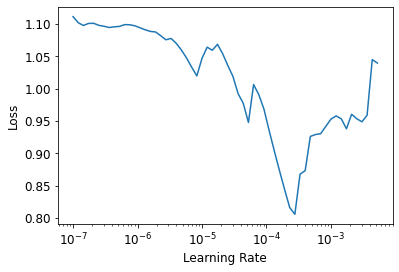

In [12]:
# Find good learning rate
learn.lr_find()

In [13]:
learn.fit(20, lr=0.0005)

epoch,train_loss,valid_loss,accuracy,time
0,0.920807,0.854912,0.693305,01:10
1,0.932846,0.862739,0.693305,01:10
2,0.909078,0.858902,0.693305,01:10
3,0.905891,0.861655,0.693305,01:10
4,0.908145,0.864196,0.693305,01:10
5,0.907742,0.855096,0.693305,01:10
6,0.894176,0.863445,0.693305,01:10
7,0.895400,0.855232,0.693305,01:10
8,0.890335,0.858898,0.693305,01:10
9,0.886869,0.853979,0.693305,01:10


In [14]:
PATH = 'fai_RNN.pth'
torch.save(net.state_dict(), PATH)